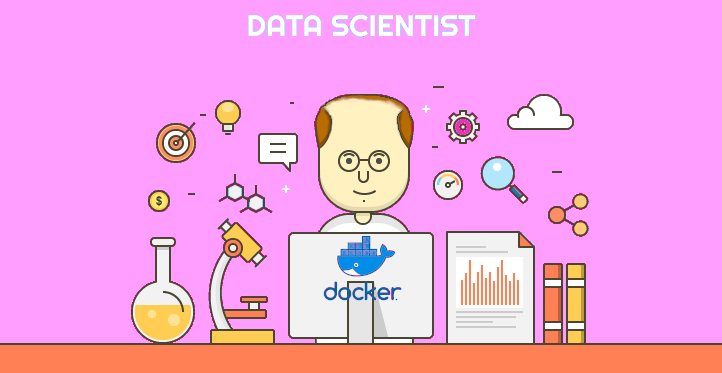

# Limpeza de Base

In [1]:
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Ler a Base

In [22]:
df = pd.read_csv('../bases/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizando valores nulos

In [19]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Separar somente os nulos
null_value_stats = df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [20]:
# Mostrar mais "amigavelmente" os valores nulos
def mostrarNulos(data):
    # A série no Pandas indica características e a soma de seus valores nulos
    null_sum = data.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = (((null_sum / len(data.index))*100).round(2)).sort_values(ascending=False)
    
    # Concatena as colunas para criar o quadro de dados completo
    df_NULL = pd.concat([total, percent], axis=1, keys=['Num.Null', 'Perc.Null'])
    
    # Limpar as linhas que não têm dados ausentes
    df_NULL = df_NULL[(df_NULL.T != 0).any()]
    
    return df_NULL

df_Age = mostrarNulos(df)
df_Age.head()

,Num.Null,Perc.Null
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


## Mostrar a Idade no Gráfico

cannot convert float NaN to integer


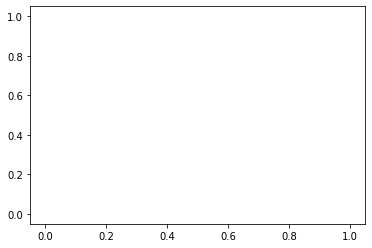

In [13]:
# Se tentarmos gerar um gráfico por IDADE...
def executarGrafico():
    try:
        sns.distplot(df['Age'])
        plt.show()
        df.count()
    except ValueError as err:
        print(err)
    
executarGrafico()

## Métodos Utilizados

Observamos que como cada método modifica os dados, é necessário em cada um deles: Ler a base, aplicar o método e mostrar o gráfico.

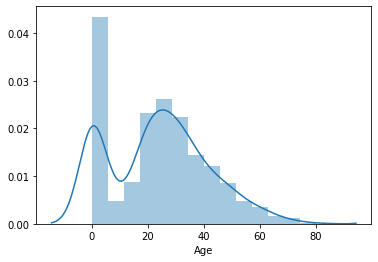

In [26]:
# Método 1a - Preencher os valores null com qualquer valor: 0, -999, ...
df = pd.read_csv('../bases/titanic.csv')
df['Age'].fillna(0, inplace=True)
executarGrafico()

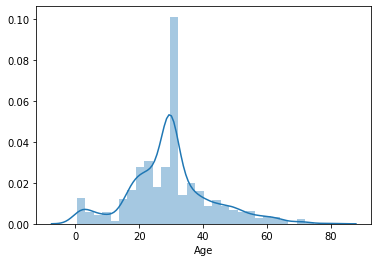

In [7]:
# Método 1b - Preencher os valores null com a média
df = pd.read_csv('../bases/titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].mean())
executarGrafico()

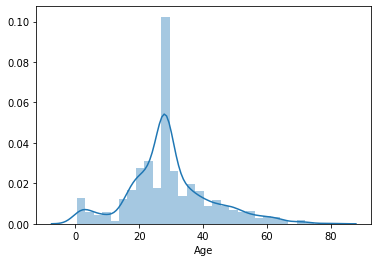

In [8]:
# Método 1c - Preencher os valores null com a mediana
df = pd.read_csv('../bases/titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
executarGrafico()

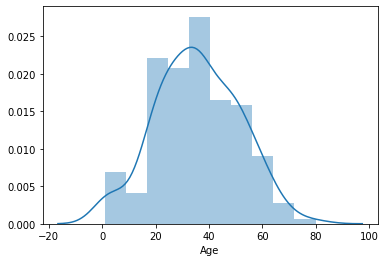

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

In [10]:
# Método 2a - Eliminar Valores
df = pd.read_csv('../bases/titanic.csv')
df = df.dropna(axis=0)
executarGrafico()
df.count()

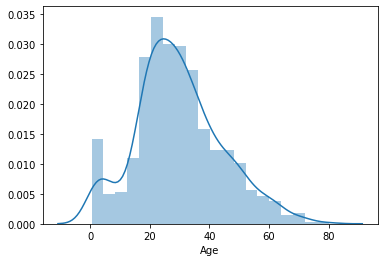

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
# Método 2b - Mostrar a coluna sem os valores nulos
df = pd.read_csv('../bases/titanic.csv')
sns.distplot(df['Age'].dropna(axis=0))
plt.show()
df.count()

Até a próxima \
Fernando Anselmo